In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),                          
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})                          

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | leh
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | aklavik
Processing Record 9 of Set 1 | sakakah
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | hobyo
Processing Record 12 of Set 1 | byron bay
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | gravatai
Processing Record 15 of Set 1 | lorengau
Processing Record 16 of Set 1 | omboue
Processing Record 17 of Set 1 | hellvik
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | lazaro cardenas
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | airai
Processing Record 22 of Set 1 | gobabis
Processing Record 23 of Set 1 | strathmore
Processing Record 24 of Set 1 | vestmanna
Processing Record 25 of Set 1 

Processing Record 41 of Set 4 | necochea
Processing Record 42 of Set 4 | nouadhibou
Processing Record 43 of Set 4 | jiangkou
Processing Record 44 of Set 4 | kupino
Processing Record 45 of Set 4 | bilibino
Processing Record 46 of Set 4 | tay ninh
Processing Record 47 of Set 4 | gurskoye
City not found. Skipping...
Processing Record 48 of Set 4 | yulara
Processing Record 49 of Set 4 | malaya vishera
Processing Record 50 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 1 of Set 5 | avarua
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | cap malheureux
Processing Record 5 of Set 5 | vaini
Processing Record 6 of Set 5 | broome
Processing Record 7 of Set 5 | obidos
Processing Record 8 of Set 5 | cedar city
Processing Record 9 of Set 5 | conakry
Processing Record 10 of Set 5 | shimizu
Processing Record 11 of Set 5 | vrangel
Processing Record 12 of Set 5 | fairbanks
Processing Reco

Processing Record 29 of Set 8 | chimbarongo
Processing Record 30 of Set 8 | sterling
Processing Record 31 of Set 8 | pangoa
Processing Record 32 of Set 8 | zyryanka
Processing Record 33 of Set 8 | iracoubo
Processing Record 34 of Set 8 | luderitz
Processing Record 35 of Set 8 | kapuskasing
Processing Record 36 of Set 8 | whitecourt
Processing Record 37 of Set 8 | noyabrsk
Processing Record 38 of Set 8 | mizdah
Processing Record 39 of Set 8 | mpulungu
Processing Record 40 of Set 8 | mali
Processing Record 41 of Set 8 | westport
Processing Record 42 of Set 8 | san juan
Processing Record 43 of Set 8 | oktyabrskiy
Processing Record 44 of Set 8 | nanortalik
Processing Record 45 of Set 8 | spornoye
Processing Record 46 of Set 8 | sao filipe
Processing Record 47 of Set 8 | douentza
Processing Record 48 of Set 8 | amberley
Processing Record 49 of Set 8 | saint john
Processing Record 50 of Set 8 | kuminskiy
Processing Record 1 of Set 9 | luba
Processing Record 2 of Set 9 | the valley
Processing

Processing Record 15 of Set 12 | pine bluff
Processing Record 16 of Set 12 | guarapari
Processing Record 17 of Set 12 | springbok
Processing Record 18 of Set 12 | mercedes
Processing Record 19 of Set 12 | paamiut
Processing Record 20 of Set 12 | pacific grove
Processing Record 21 of Set 12 | gazimurskiy zavod
Processing Record 22 of Set 12 | chikwawa
Processing Record 23 of Set 12 | watsa
Processing Record 24 of Set 12 | urumqi
Processing Record 25 of Set 12 | mareeba
Processing Record 26 of Set 12 | tecoanapa
Processing Record 27 of Set 12 | kinsale
Processing Record 28 of Set 12 | champerico
Processing Record 29 of Set 12 | san cristobal
Processing Record 30 of Set 12 | campos altos
Processing Record 31 of Set 12 | dakar
Processing Record 32 of Set 12 | umuahia
Processing Record 33 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 34 of Set 12 | muriwai beach
Processing Record 35 of Set 12 | morvi
Processing Record 36 of Set 12 | san-pedro
Processing Record 37 of Se

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-11-08 01:24:14,22.0752,-159.3190,84.18,69,20,4.00
1,Busselton,AU,2021-11-08 01:24:04,-33.6500,115.3333,65.05,57,5,13.47
2,Saldanha,ZA,2021-11-08 01:29:00,-33.0117,17.9442,60.85,73,88,21.25
3,Kavaratti,IN,2021-11-08 01:29:00,10.5669,72.6420,81.34,73,100,7.11
4,Leh,IN,2021-11-08 01:29:00,34.1667,77.5833,17.19,62,0,3.89


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
################

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

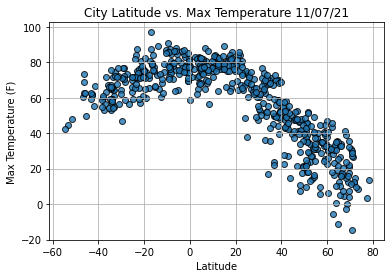

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

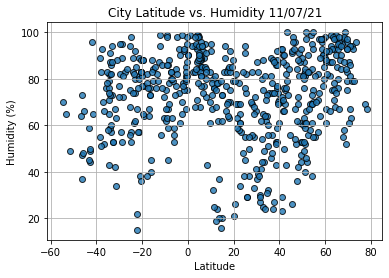

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

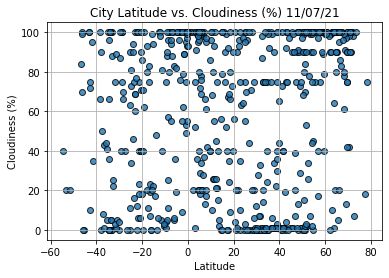

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

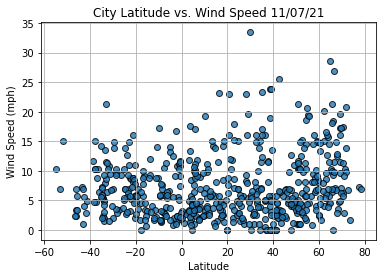

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()